# Exploratory Data Analysis

**Objective**: Predict the continuous variable `outcome` from a tabular dataset containing 30 features (3 categorical, 27 numeric).

**Dataset**: 10,000 training samples and 1,000 test samples.

Here we will explore the data to understand its structure, identify patterns, to help inform preprocessing and modeling decisions.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

RANDOM = 123
np.random.seed(RANDOM)

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
sns.set_style('whitegrid')

In [11]:
train = pd.read_csv('../data/CW1_train.csv')
test = pd.read_csv('../data/CW1_test.csv')

print(f'Training set: {train.shape[0]} samples, {train.shape[1]} columns')
print(f'Test set:     {test.shape[0]} samples, {test.shape[1]} columns')
print(f'\nColumn types:')
print(train.dtypes.value_counts())
train.head()

Training set: 10000 samples, 31 columns
Test set:     1000 samples, 30 columns

Column types:
float64    27
str         3
int64       1
Name: count, dtype: int64


,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
outcome,10000.0,-4.979081,12.722224,-44.879471,-13.989962,-5.442794,3.918593,39.675966
carat,10000.0,0.798407,0.472046,0.200000,0.400000,0.710000,1.040000,4.000000
depth,10000.0,61.748060,1.429631,50.800000,61.000000,61.900000,62.500000,70.500000
table,10000.0,57.467360,2.247036,44.000000,56.000000,57.000000,59.000000,73.000000
price,10000.0,3910.841900,3940.369616,326.000000,965.000000,2441.000000,5226.000000,18791.000000
x,10000.0,5.733974,1.114850,0.000000,4.730000,5.700000,6.530000,10.010000
y,10000.0,5.741665,1.228057,0.000000,4.740000,5.720000,6.530000,58.900000
z,10000.0,3.540757,0.692502,0.000000,2.920000,3.530000,4.030000,8.060000
a1,10000.0,0.502349,0.291012,0.000128,0.249922,0.502063,0.753191,0.999789
a2,10000.0,0.507509,0.291207,0.000101,0.251350,0.510046,0.764731,0.999976


The dataset has three types of features:
- **Categorical (3)**: `cut`, `color`, `clarity` -  quality descriptors
- **Interpretable numeric (7)**: `carat`, `depth`, `table`, `price`, `x`, `y`, `z` - physical measurements
- **Latent numeric (20)**: `a1`-`a10`, `b1`-`b10` - synthetic/latent features

## 1. Data Quality

In [13]:
print('Missing values:')
print(f'  Train: {train.isnull().sum().sum()}')
print(f'  Test:  {test.isnull().sum().sum()}')

print(f'\nDuplicate rows:')
print(f'  Train: {train.duplicated().sum()}')
print(f'  Test:  {test.duplicated().sum()}')

# Verify test has same features (minus target)
train_features = set(train.columns) - {'outcome'}
test_features = set(test.columns)
print(f'\nFeature mismatch: {train_features.symmetric_difference(test_features)}')

Missing values:
  Train: 0
  Test:  0

Duplicate rows:
  Train: 0
  Test:  0

Feature mismatch: set()


No missing values or duplicates in either set, and the feature schemas match. No data cleaning is needed.

## 2. Target Variable

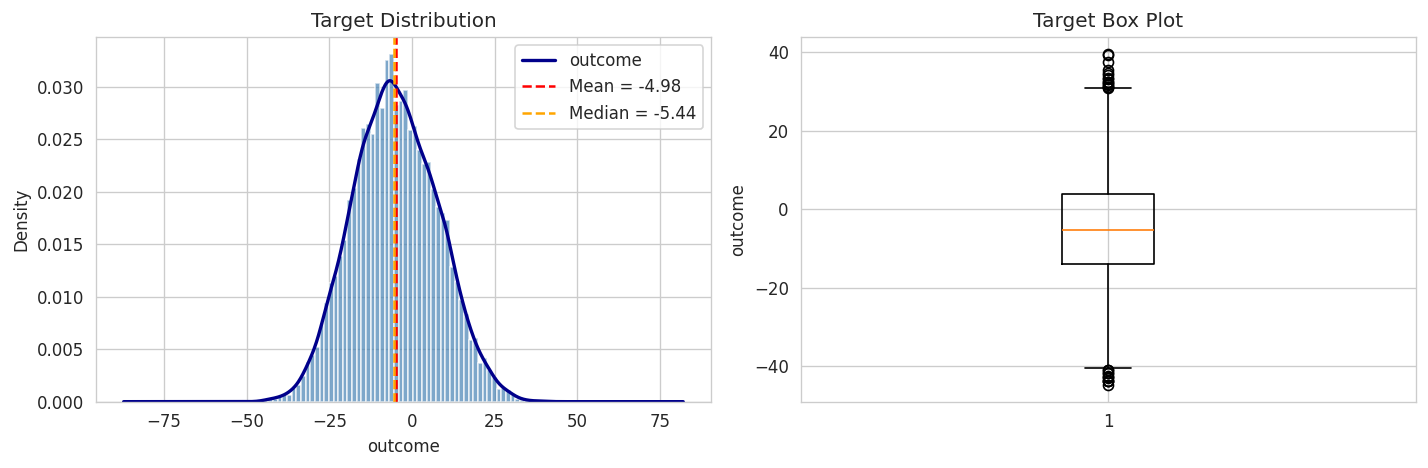

Mean:     -4.98
Std:      12.72
Median:   -5.44
Range:    [-44.9, 39.7]
Skewness: 0.083
Kurtosis: -0.260


In [14]:
y = train['outcome']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram with KDE
ax = axes[0]
ax.hist(y, bins=60, density=True, alpha=0.7, color='steelblue', edgecolor='white')
y.plot.kde(ax=ax, color='darkblue', linewidth=2)
ax.axvline(y.mean(), color='red', linestyle='--', label=f'Mean = {y.mean():.2f}')
ax.axvline(y.median(), color='orange', linestyle='--', label=f'Median = {y.median():.2f}')
ax.set_xlabel('outcome')
ax.set_ylabel('Density')
ax.set_title('Target Distribution')
ax.legend()

# Box plot
ax = axes[1]
ax.boxplot(y, vert=True)
ax.set_ylabel('outcome')
ax.set_title('Target Box Plot')

plt.tight_layout()
plt.show()

print(f'Mean:     {y.mean():.2f}')
print(f'Std:      {y.std():.2f}')
print(f'Median:   {y.median():.2f}')
print(f'Range:    [{y.min():.1f}, {y.max():.1f}]')
print(f'Skewness: {y.skew():.3f}')
print(f'Kurtosis: {y.kurtosis():.3f}')

The target is continuous and approximately symmetric (skewness near 0), centered around -5 with moderate spread (std ~12.7). The near-zero skewness suggests no target transformation may not be needed. This is a standard regression task

## 3. Categorical Features

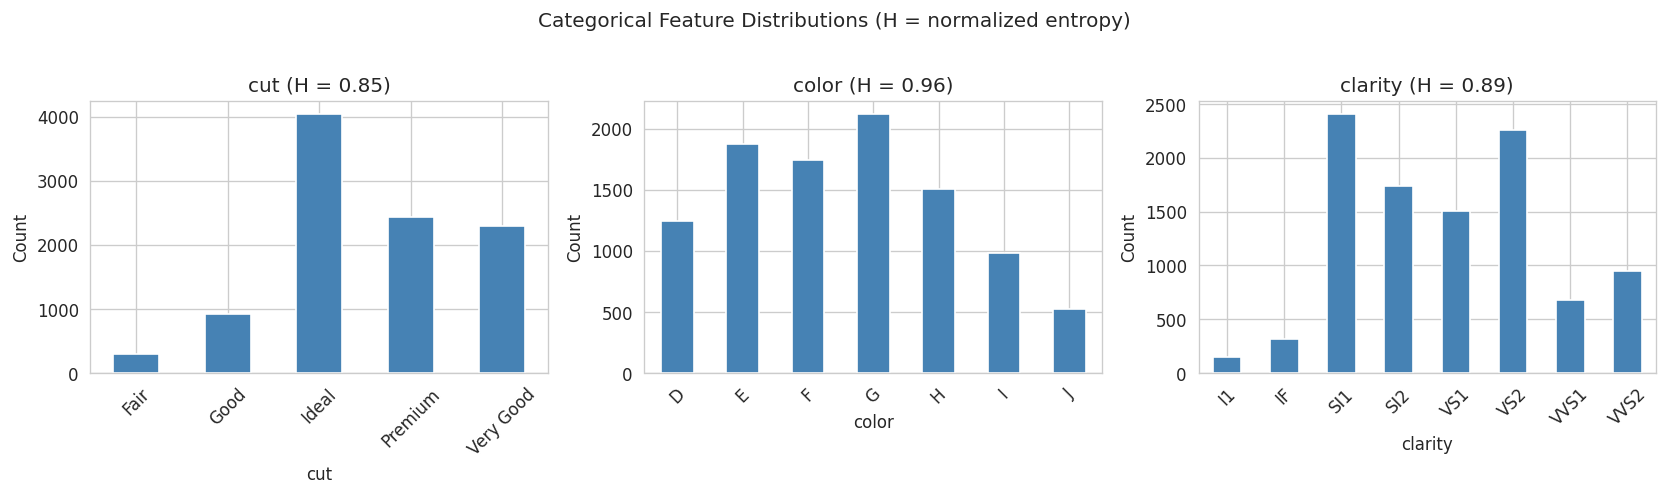

In [15]:
categorical_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, col in enumerate(categorical_cols):
    counts = train[col].value_counts()
    probs = counts / counts.sum()
    entropy = -np.sum(probs * np.log2(probs))
    max_entropy = np.log2(len(counts))
    norm_entropy = entropy / max_entropy
    
    ax = axes[i]
    counts.sort_index().plot.bar(ax=ax, color='steelblue', edgecolor='white')
    ax.set_title(f'{col} (H = {norm_entropy:.2f})')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Categorical Feature Distributions (H = normalized entropy)', y=1.02)
plt.tight_layout()
plt.show()

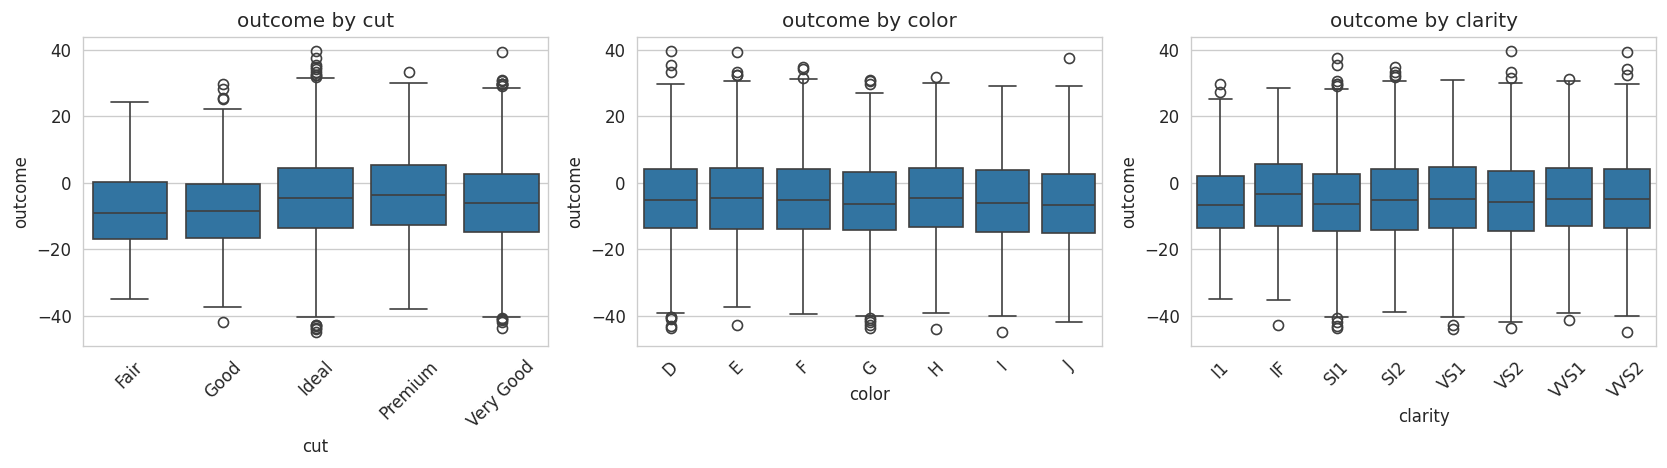

In [16]:
# Categorical features vs target
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = sorted(train[col].unique())
    sns.boxplot(data=train, x=col, y='outcome', ax=ax, order=order)
    ax.set_title(f'outcome by {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

All three categorical features are well-balanced (normalized entropy 0.85-0.96), meaning no category dominates. The box plots show that the target distributions are similar across categories - categorical features have weak marginal predictive power.

**Preprocessing decision**: Use one-hot encode with `drop_first=True`. No category merging needed given the balanced distributions.

## 4. Interpretable Numeric Features

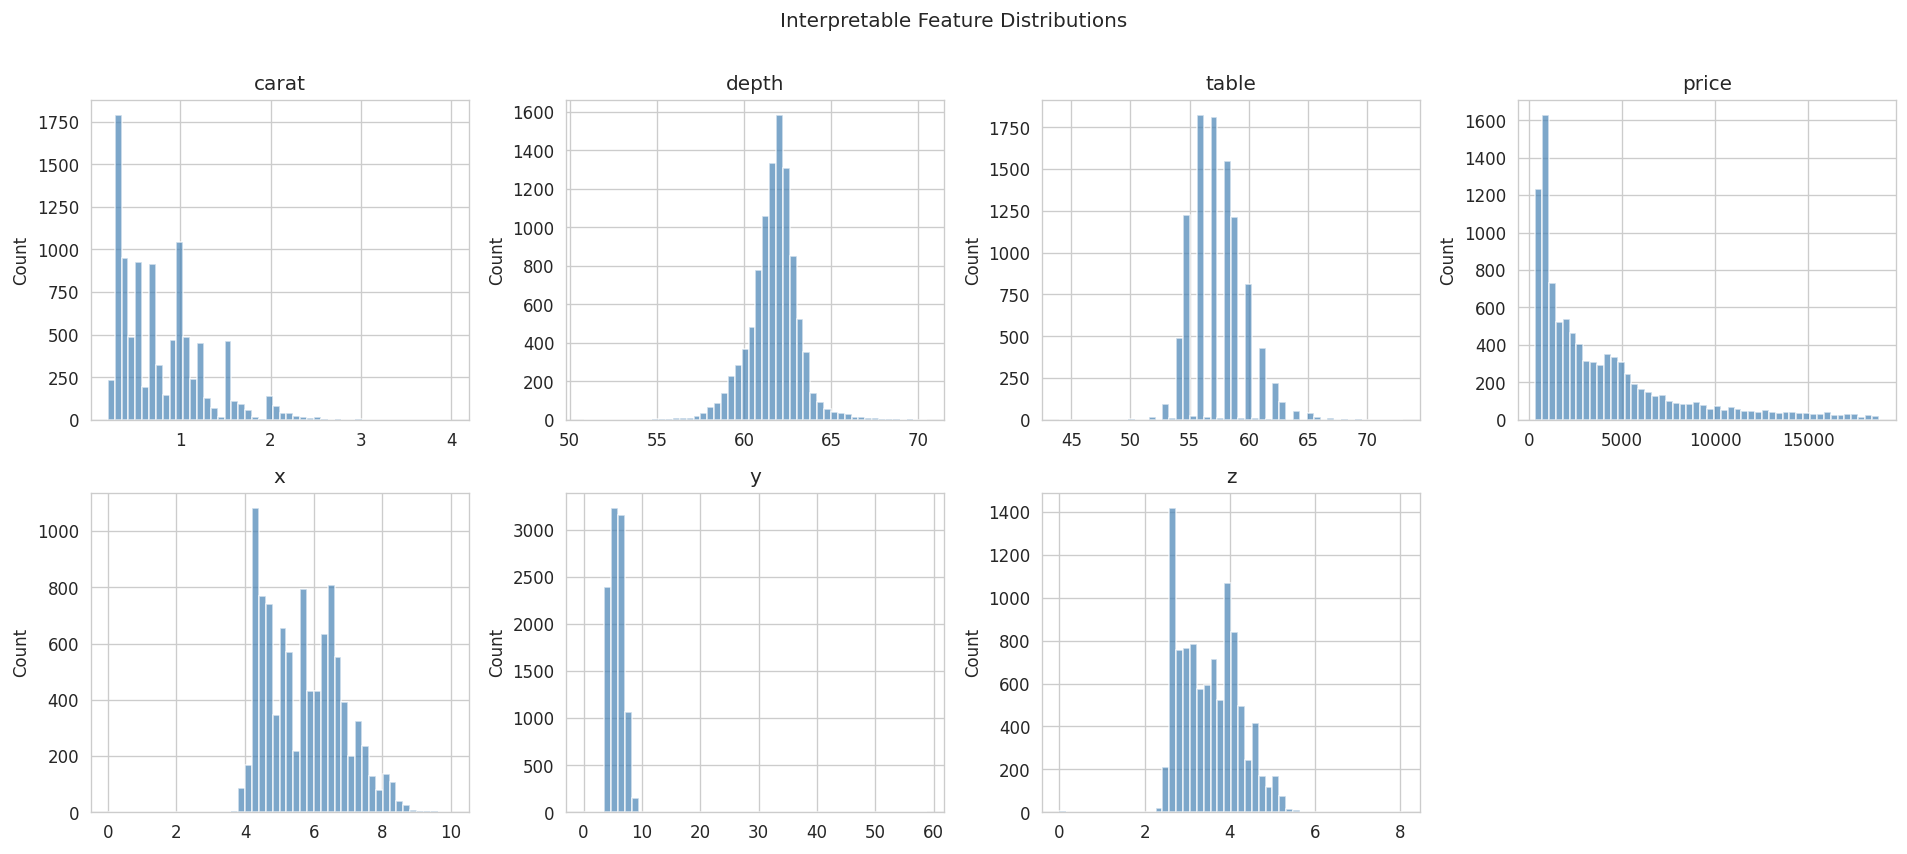

,carat,depth,table,price,x,y,z
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.80,61.75,57.47,3910.84,5.73,5.74,3.54
std,0.47,1.43,2.25,3940.37,1.11,1.23,0.69
min,0.20,50.80,44.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,965.00,4.73,4.74,2.92
50%,0.71,61.90,57.00,2441.00,5.70,5.72,3.53
75%,1.04,62.50,59.00,5226.00,6.53,6.53,4.03
max,4.00,70.50,73.00,18791.00,10.01,58.90,8.06


In [17]:
interp_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

fig, axes = plt.subplots(2, 4, figsize=(16, 7))
axes = axes.flatten()

for i, col in enumerate(interp_cols):
    ax = axes[i]
    ax.hist(train[col], bins=50, alpha=0.7, color='steelblue', edgecolor='white')
    ax.set_title(col)
    ax.set_ylabel('Count')

axes[-1].set_visible(False)  # Hide empty subplot
plt.suptitle('Interpretable Feature Distributions', y=1.01)
plt.tight_layout()
plt.show()

train[interp_cols].describe().round(2)

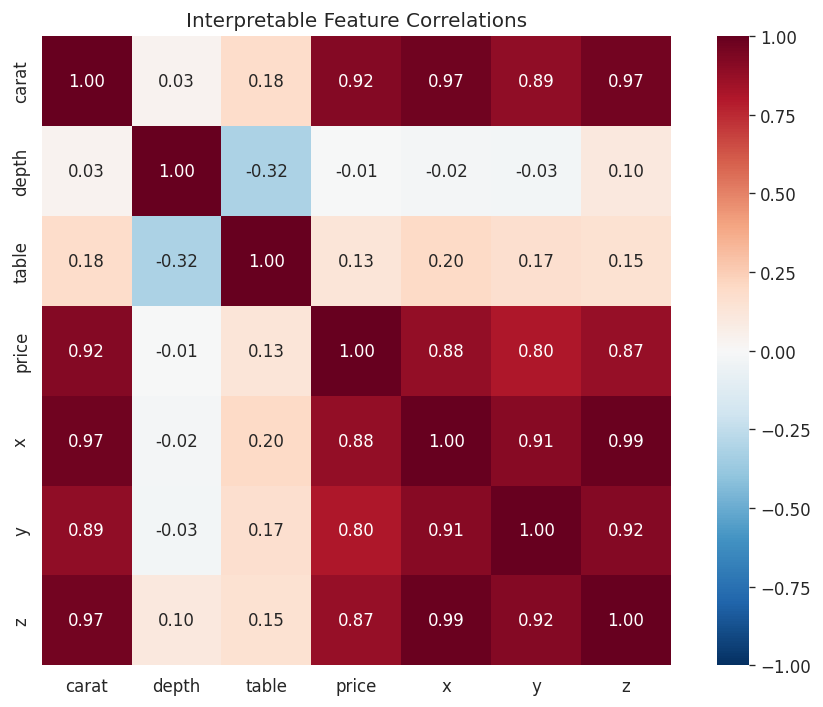

In [18]:
# Correlation heatmap for interpretable features
corr_interp = train[interp_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_interp, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            vmin=-1, vmax=1, ax=ax, square=True)
ax.set_title('Interpretable Feature Correlations')
plt.tight_layout()
plt.show()

The interpretable features show extreme multicollinearity: `carat`, `price`, `x`, `y`, and `z` form a tightly correlated cluster (r up to 0.99). Features `depth` and `table` are relatively independent.

The distributions are heterogeneous: `price` and `carat` are right-skewed, while `depth` and `table` are tightly concentrated.

**Implications**: 
- Linear models will struggle with multicollinearity (unstable coefficients)
- Tree-based models handle multicollinearity naturally through feature splitting
- We may consider dropping redundant features (`price`, `x`, `y`, `z`) to reduce noise

## 5. Latent Numeric Features

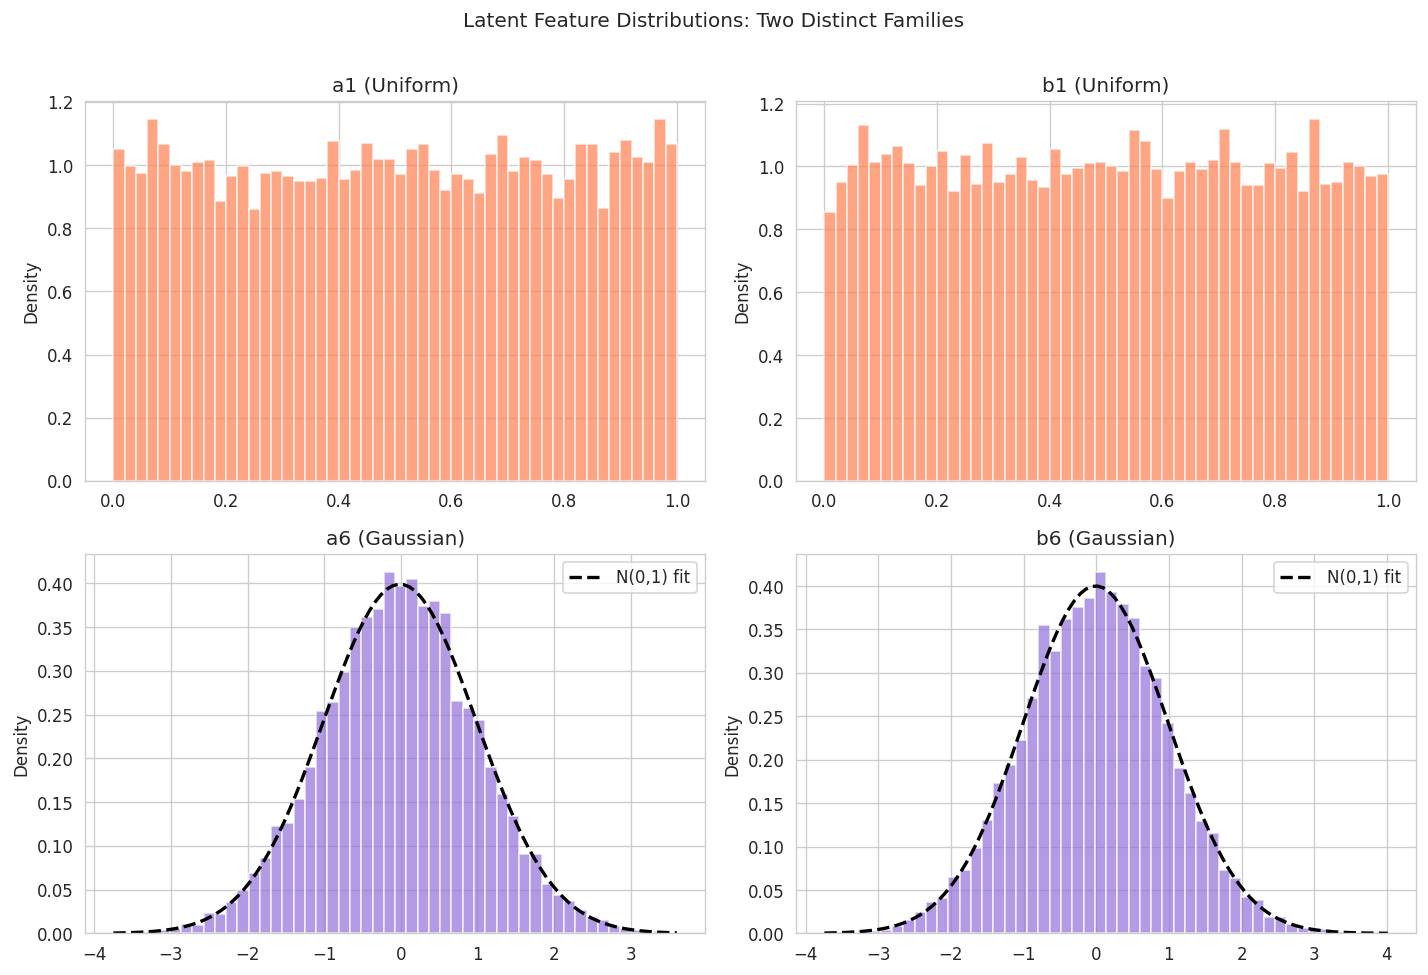

Uniform features (a1-a5, b1-b5) summary:
         a1     a2     a3     a4     a5     b1     b2     b3     b4     b5
mean  0.502  0.508  0.504  0.501  0.501  0.500  0.500  0.501  0.503  0.500
std   0.291  0.291  0.289  0.288  0.289  0.288  0.289  0.290  0.286  0.289
min   0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000
max   1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000

Gaussian features (a6-a10, b6-b10) summary:
         a6     a7     a8     a9    a10     b6     b7     b8     b9    b10
mean -0.012 -0.010 -0.022 -0.009 -0.013 -0.007 -0.003 -0.015  0.000 -0.009
std   1.000  1.001  1.011  1.010  1.004  0.997  0.992  0.991  1.006  1.005
min  -3.751 -3.701 -3.811 -3.549 -3.532 -3.740 -3.988 -4.245 -3.649 -3.862
max   3.601  3.593  4.243  3.715  4.136  4.013  3.813  3.997  3.808  3.471


In [19]:
latent_uniform = ['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5']
latent_gaussian = ['a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Representative uniform features
for i, col in enumerate(['a1', 'b1']):
    ax = axes[0, i]
    ax.hist(train[col], bins=50, alpha=0.7, color='coral', edgecolor='white', density=True)
    ax.set_title(f'{col} (Uniform)')
    ax.set_ylabel('Density')

# Representative Gaussian features
for i, col in enumerate(['a6', 'b6']):
    ax = axes[1, i]
    ax.hist(train[col], bins=50, alpha=0.7, color='mediumpurple', edgecolor='white', density=True)
    x_range = np.linspace(train[col].min(), train[col].max(), 100)
    ax.plot(x_range, stats.norm.pdf(x_range, train[col].mean(), train[col].std()),
            'k--', linewidth=2, label='N(0,1) fit')
    ax.set_title(f'{col} (Gaussian)')
    ax.set_ylabel('Density')
    ax.legend()

plt.suptitle('Latent Feature Distributions: Two Distinct Families', y=1.01)
plt.tight_layout()
plt.show()

print('Uniform features (a1-a5, b1-b5) summary:')
print(train[latent_uniform].describe().loc[['mean', 'std', 'min', 'max']].round(3))
print(f'\nGaussian features (a6-a10, b6-b10) summary:')
print(train[latent_gaussian].describe().loc[['mean', 'std', 'min', 'max']].round(3))

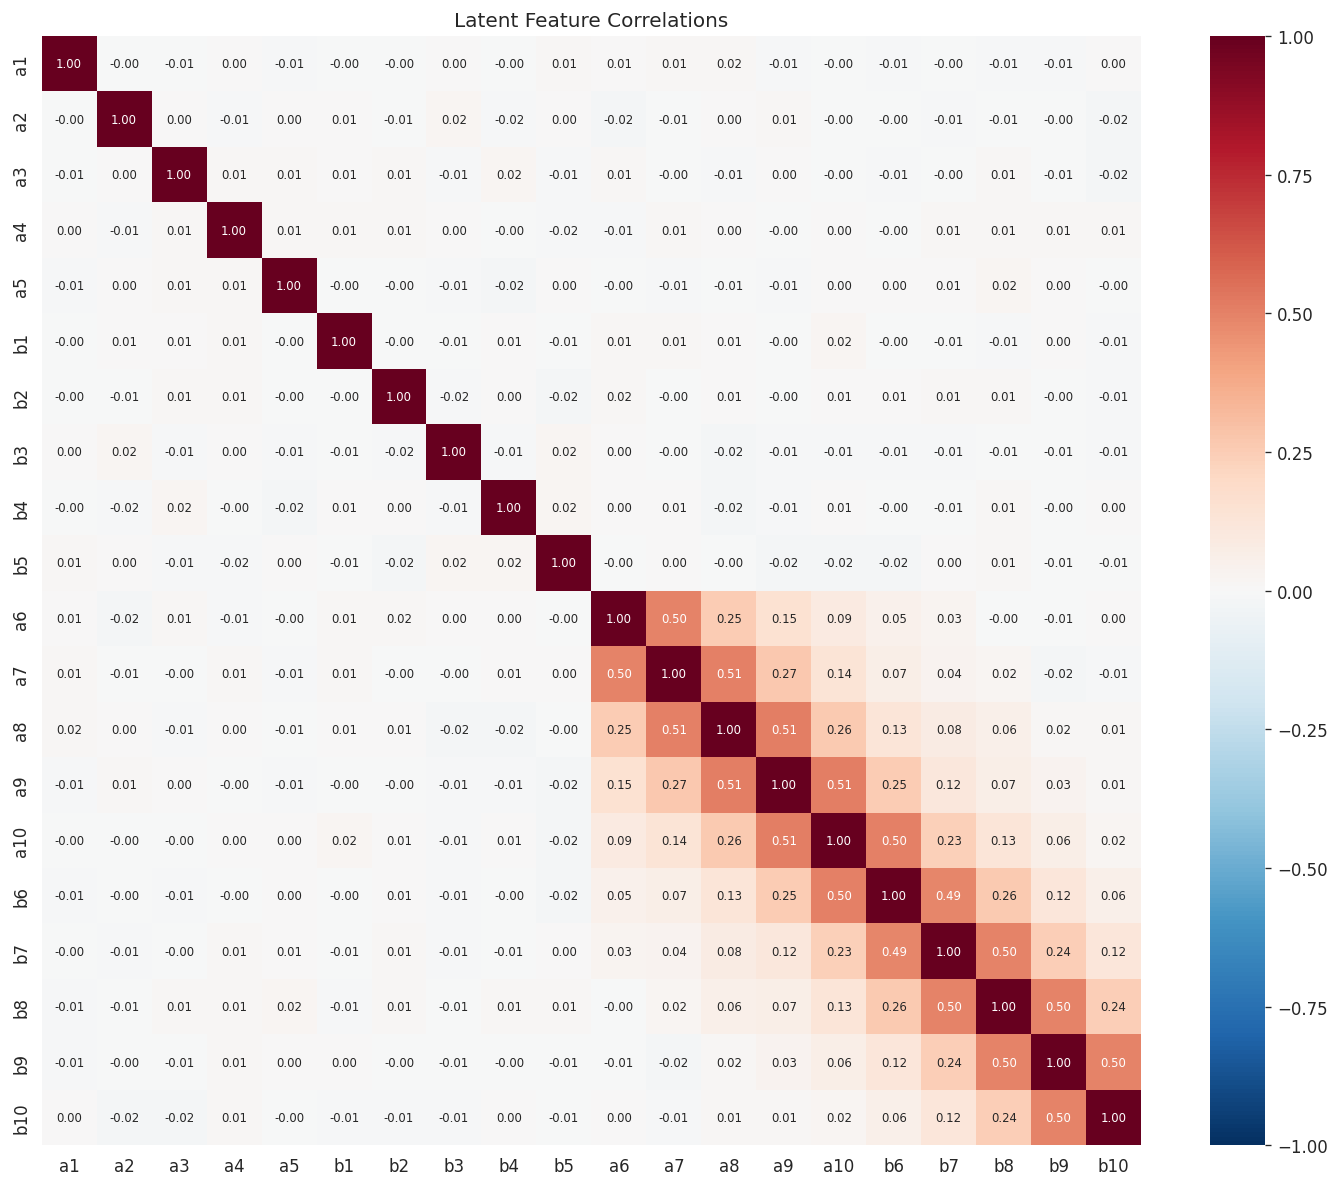

In [20]:
# Latent feature correlation heatmap
latent_all = latent_uniform + latent_gaussian
corr_latent = train[latent_all].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_latent, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            vmin=-1, vmax=1, ax=ax, annot_kws={'size': 7})
ax.set_title('Latent Feature Correlations')
plt.tight_layout()
plt.show()

The 20 latent features fall into two distinct distributional families:
- **Uniform** (`a1`-`a5`, `b1`-`b5`): Approximately Uniform(0,1), largely independent of each other
- **Gaussian** (`a6`-`a10`, `b6`-`b10`): Approximately N(0,1), forming a moderately correlated block

## 6. Feature-Target Relationships

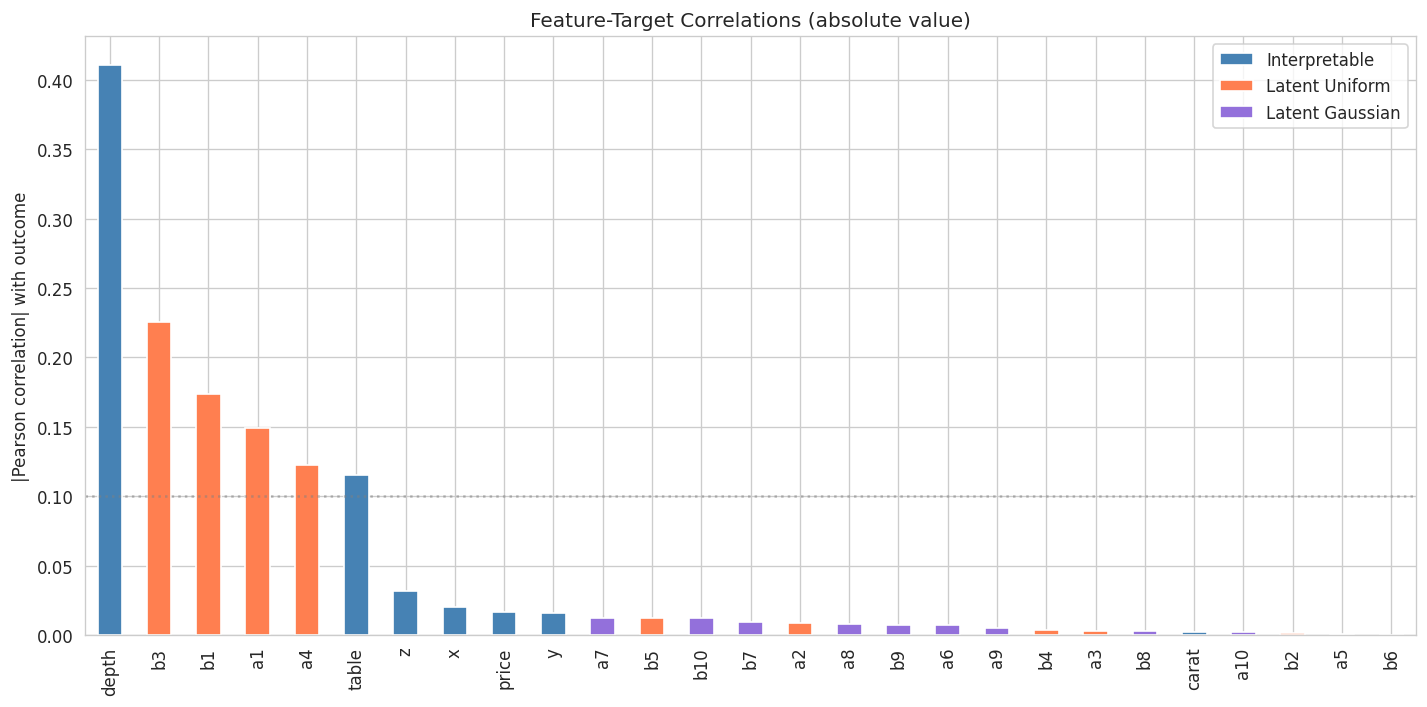

In [21]:
# Compute correlations with target for all numeric features
from sklearn.preprocessing import OneHotEncoder

numeric_cols = train.select_dtypes(include=[np.number]).columns.drop('outcome')
correlations = train[numeric_cols].corrwith(y).abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['coral' if c in latent_uniform else 'mediumpurple' if c in latent_gaussian else 'steelblue'
          for c in correlations.index]
correlations.plot.bar(ax=ax, color=colors, edgecolor='white')
ax.set_ylabel('|Pearson correlation| with outcome')
ax.set_title('Feature-Target Correlations (absolute value)')
ax.axhline(y=0.1, color='grey', linestyle=':', alpha=0.5)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='steelblue', label='Interpretable'),
    Patch(facecolor='coral', label='Latent Uniform'),
    Patch(facecolor='mediumpurple', label='Latent Gaussian')
]
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

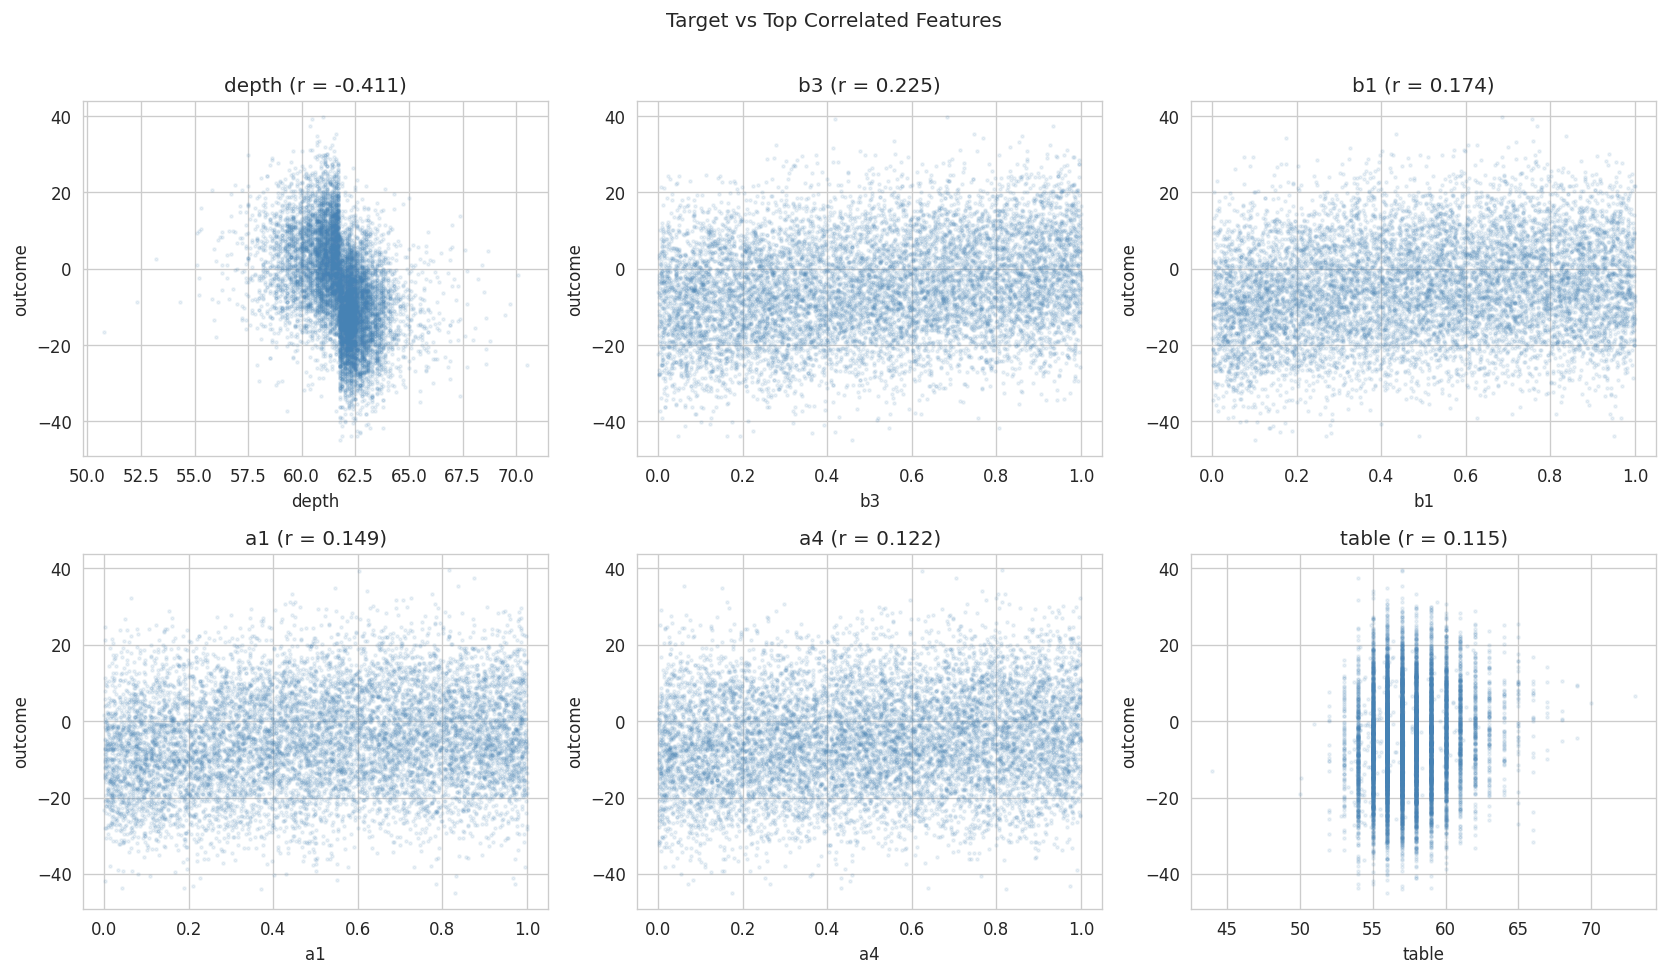

In [22]:
# Scatter plots: target vs top 6 correlated features
top_features = correlations.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for i, col in enumerate(top_features):
    ax = axes[i]
    ax.scatter(train[col], y, alpha=0.1, s=3, color='steelblue')
    ax.set_xlabel(col)
    ax.set_ylabel('outcome')
    r = train[col].corr(y)
    ax.set_title(f'{col} (r = {r:.3f})')

plt.suptitle('Target vs Top Correlated Features', y=1.01)
plt.tight_layout()
plt.show()

Key observations:
- **Latent features** (especially Gaussian) show stronger marginal correlations with the target than interpretable features
- Even the strongest individual correlations are modest (|r| < 0.25), indicating no single feature is a strong predictor
- The scatter plots show noisy, potentially nonlinear relationships
- This pattern - weak marginal effects but likely strong joint structure - motivates **nonlinear models** that can capture feature interactions

## 7. Summary and Preprocessing Decisions

### Key Findings

1. **Clean data**: No missing values or duplicates - no imputation or cleaning required
2. **Symmetric target**: Approximately normal, centered at -5, no transformation needed
3. **Categorical features**: Well-balanced (entropy > 0.85), weak marginal effect on target
4. **Multicollinearity**: `carat`, `price`, `x`, `y`, `z` are highly redundant (r up to 0.99)
5. **Latent features dominate**: Stronger correlations with target than interpretable features
6. **Weak individual signals**: No single feature explains much variance - predictive power requires capturing interactions

### Preprocessing Pipeline

- **Categorical**: One-hot encoding with `drop_first=True`
- **Numeric**: Passthrough for tree models (no scaling needed); StandardScaler for linear/distance-based models
- **Feature reduction**: Consider dropping `price`, `x`, `y`, `z` (redundant with `carat`)

### Modeling Implications

- Linear models can be limited by multicollinearity and nonlinear structure
- **Tree-based ensemble methods** could be a better approach. They handle multicollinearity, mixed feature types, and nonlinear interactions naturally
- Boosting methods may be useful, as they iteratively refine residuals